## Investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

### Following the instructions on @fedhere's GitHub - [Assigment3_instructions](https://github.com/fedhere/PUI2017_fb55/blob/master/HW5_fb55/Assignment3_instructionsUpdated.ipynb).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
import statsmodels.formula.api as smf
import statsmodels.graphics.regressionplots as smgr
import seaborn as sns
sns.set_style('whitegrid')

try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/HW5_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv')
df.columns

Index(['Country/Territory', 'ISO code', 'Source', '% of homicides by firearm',
       'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms'],
      dtype='object')

In [3]:
df.drop(['ISO code', 'Source', '% of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people'], axis=1, inplace=True)
df = df.rename(columns={"Country/Territory": "Country"})
df.head()

,Country,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [4]:
url = 'data:application/octet-stream;charset=utf-8,Country%2CGuns%2F100%20inhabitants%2CNumber%20of%20mass%20shootings%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABeligium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78'
try:
    response = urllib.urlopen(url)
    df2 = pd.read_csv(response)
except urllib.HTTPError:
    print('Invalid URL!!!')
    
df2.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [5]:
df3 = pd.read_csv('https://raw.githubusercontent.com/unissechua/PUI2017_uc288/master/HW5_uc288/data/POP.csv', skiprows=[0,1,2,3])
df3.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')

In [6]:
df3.drop(['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2013', '2014',
       '2015', '2016', 'Unnamed: 61'], axis=1, inplace=True)
df3 = df3.rename(columns={"2012": "pop"})
df3.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [7]:
df4 = pd.read_csv('https://raw.githubusercontent.com/unissechua/PUI2017_uc288/master/HW5_uc288/data/GDP.csv', skiprows=[0,1,2,3])
df4.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')

In [8]:
df4.drop(['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2013', '2014',
       '2015', '2016', 'Unnamed: 61'], axis=1, inplace=True)
df4 = df4.rename(columns={"2012": "gdp"})
df4.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.153984e+11
3,Albania,1.231978e+10
4,Andorra,3.146152e+09


In [9]:
df3 = df3.merge(df4, right_on="Country Name", left_on="Country Name")
df3.head()

,Country Name,pop,gdp
0,Aruba,102577.0,NaN
1,Afghanistan,30696958.0,2.053654e+10
2,Angola,25096150.0,1.153984e+11
3,Albania,2900401.0,1.231978e+10
4,Andorra,82431.0,3.146152e+09


In [10]:
df3 = df3.rename(columns={"Country Name": "Country"})
df3.head()

,Country,pop,gdp
0,Aruba,102577.0,NaN
1,Afghanistan,30696958.0,2.053654e+10
2,Angola,25096150.0,1.153984e+11
3,Albania,2900401.0,1.231978e+10
4,Andorra,82431.0,3.146152e+09


In [11]:
df = df.merge(df3, on="Country")
df.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,pop,gdp
0,Albania,56.0,270000.0,2900401.0,1.231978e+10
1,Algeria,20.0,1900000.0,37565847.0,2.090474e+11
2,Angola,NaN,2800000.0,25096150.0,1.153984e+11
3,Argentina,1198.0,3950000.0,42096739.0,5.459824e+11
4,Armenia,9.0,380000.0,2881922.0,1.061932e+10


In [12]:
df = df.merge(df2, on="Country")
df.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,pop,gdp,Guns/100 inhabitants,Number of mass shootings
0,Australia,30.0,3050000.0,22728254.0,1.538194e+12,15.0,4
1,Austria,18.0,2500000.0,8429991.0,4.074516e+11,30.4,1
2,Canada,173.0,9950000.0,34750545.0,1.824289e+12,30.8,4
3,Denmark,15.0,650000.0,5591572.0,3.271489e+11,12.0,0
4,Finland,24.0,2400000.0,5413971.0,2.567065e+11,45.3,2


In [13]:
len(df)

22

# Exploration

## Plot mass shooting vs GDP in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


In [14]:
df['gdpcapita'] = df['gdp'] / df['pop']
df.tail(8)

,Country,Number of homicides by firearm,Average total all civilian firearms,pop,gdp,Guns/100 inhabitants,Number of mass shootings,gdpcapita
14,New Zealand,7.0,925000.0,4408100.0,1.761929e+11,22.6,3,39970.256245
15,Norway,2.0,1400000.0,5018573.0,5.097049e+11,31.3,1,101563.702678
16,Poland,35.0,510000.0,38063164.0,5.003443e+11,1.3,0,13145.104842
17,Portugal,44.0,900000.0,10514844.0,2.163682e+11,8.5,1,20577.402638
18,Spain,90.0,4500000.0,46773055.0,1.335946e+12,10.4,1,28562.293240
19,Sweden,37.0,2800000.0,9519374.0,5.438806e+11,31.6,2,57134.077068
20,Switzerland,57.0,3400000.0,7996861.0,6.650541e+11,45.7,2,83164.387954
21,United States,9146.0,270000000.0,313998379.0,1.615526e+13,88.8,78,51450.122295


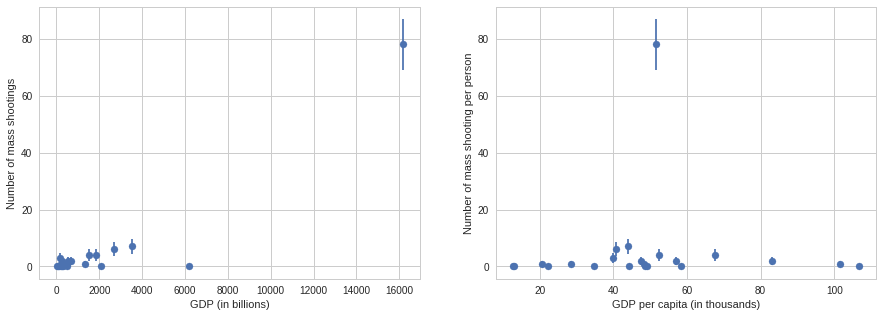

In [15]:
fig = pl.figure(figsize=(15,5)) 
ax1 = fig.add_subplot(121)

# plot mass shootings vs GDP in absolute numbers
scatter1 = ax1.scatter(df.gdp / 1e9, df['Number of mass shootings'])
ax1.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax1.set_xlabel("GDP (in billions)")
ax1.set_ylabel("Number of mass shootings")
ax1.set_ylim()

ax2 = fig.add_subplot(122)

# plot mass shootings vs GDP/per person
scatter2 = ax2.scatter(df['gdpcapita'] / 1e3, df['Number of mass shootings'])
ax2.errorbar(df['gdpcapita'] / 1e3, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax2.set_xlabel("GDP per capita (in thousands)")
ax2.set_ylabel("Number of mass shooting per person")
ax2.set_ylim()

pl.show()

### Figure 1. Number of mass shootings vs GDP (in billions)
Errors represent Poisson statistics. The datapoint to the top right of the plot is the USA which has both the highest GDP and the highest number of mass shootings.

### Figure 2. Number of mass shootings vs GDP per capita (in thousands)
Errors represent Poisson statistics. The datapoint in the top center of the plot is still USA which has the highest number of mass shootings but it is no longer the one with the highest GDP per person.

## Plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

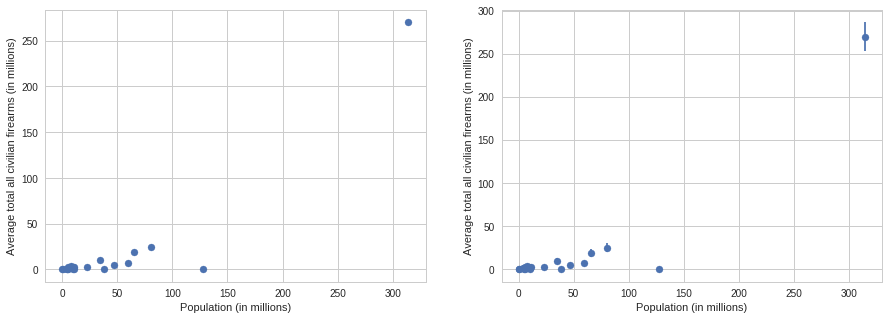

In [16]:
fig = pl.figure(figsize=(15,5)) 
ax1 = fig.add_subplot(121)

scatter1 = ax1.scatter(df['pop'] / 1e6, df['Average total all civilian firearms'] / 1e6)
ax1.set_xlabel("Population (in millions)")
ax1.set_ylabel("Average total all civilian firearms (in millions)")
ax1.set_ylim();

ax2 = fig.add_subplot(122)

scatter2 = ax2.scatter(df['pop'] / 1e6, df['Average total all civilian firearms'] / 1e6)
ax2.errorbar(df['pop'] / 1e6, df['Average total all civilian firearms'] / 1e6, 
            yerr = np.sqrt(df['Average total all civilian firearms'] / 1e6 * 1.0), fmt = '.')
ax2.set_xlabel("Population (in millions)")
ax2.set_ylabel("Average total all civilian firearms (in millions)")
ax2.set_ylim();

### Figure 3. Average number of civilian firearms per person (without errors)
The outlier here is still the USA which has the highest number of civilian firearms and the highest population.

### Figure 4. Average number of civilian firearms per person (with errors)
Errors here represent Poisson statistics. 

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

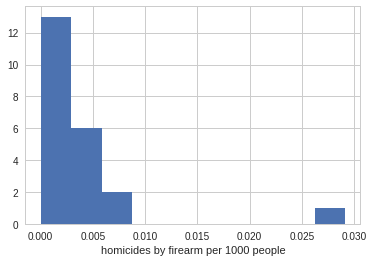

In [17]:
fig, ax = plt.subplots()
ax.hist(df['Number of homicides by firearm'] / df['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

### Figure 5. Histogram of the number of homicides by firearm per person
This shows an outlier with a high average number of homicides by firearms per 1,000 people in their population which has only one occurrence 

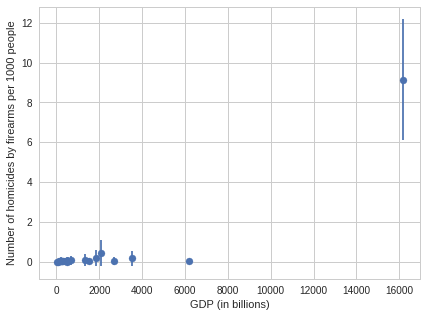

In [18]:
fig = pl.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
scatter1 = ax1.scatter(df['gdp'] / 1e9, df['Number of homicides by firearm'] / 1e3)
ax1.errorbar(df['gdp'] / 1e9, df['Number of homicides by firearm'] / 1e3, 
            yerr = np.sqrt(df['Number of homicides by firearm'] / 1e3 * 1.0), fmt = '.')
ax1.set_xlabel("GDP (in billions)")
ax1.set_ylabel("Number of homicides by firearms per 1000 people")
ax1.set_ylim()
pl.show()

### Figure 6. Number of homicides by firearms for every 1000 people vs GDP in billions.
Here, we still see the USA as the outlier with a high average of homicides by firearms and a high GDP.

## Plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [19]:
df_usa = df[df['Country'] == 'United States']
df_usa

,Country,Number of homicides by firearm,Average total all civilian firearms,pop,gdp,Guns/100 inhabitants,Number of mass shootings,gdpcapita
21,United States,9146.0,270000000.0,313998379.0,1.615526e+13,88.8,78,51450.122295


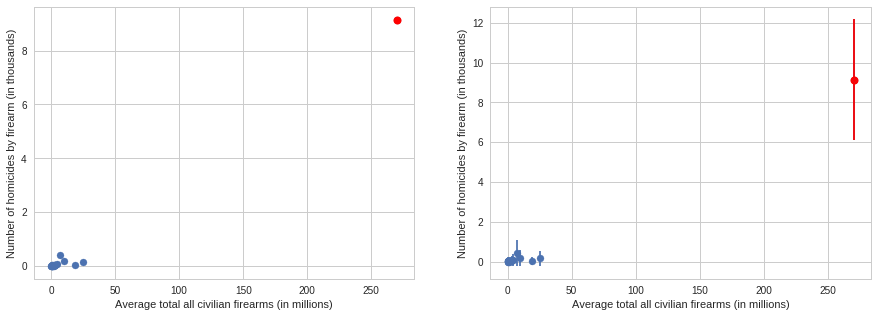

In [20]:
fig = pl.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.scatter(df['Average total all civilian firearms'] / 1e6 , df['Number of homicides by firearm'] / 1e3)
ax1.plot(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of homicides by firearm'] / 1e3, 'ro', markersize=8)
ax1.set_xlabel('Average total all civilian firearms (in millions)')
ax1.set_ylabel('Number of homicides by firearm (in thousands)')
ax1.set_ylim();

ax2 = fig.add_subplot(122)
ax2.scatter(df['Average total all civilian firearms'] / 1e6 , df['Number of homicides by firearm'] / 1e3)
ax2.errorbar(df['Average total all civilian firearms'] / 1e6 , df['Number of homicides by firearm'] / 1e3,
            yerr=np.sqrt(df['Number of homicides by firearm'] / 1e3 * 1.0), fmt='.')
ax2.plot(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of homicides by firearm'] / 1e3, 'ro', markersize=8)
ax2.errorbar(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of homicides by firearm'] / 1e3,
            yerr=np.sqrt(df_usa['Number of homicides by firearm'] / 1e3 * 1.0), fmt='.', color='r')
ax2.set_xlabel('Average total all civilian firearms (in millions)')
ax2.set_ylabel('Number of homicides by firearm (in thousands)')
ax2.set_ylim();

### Figure 7. Number of homicides by firearms against Average total civilian firearms (in millions) 
This shows the relationship between the number of homicides by firearms against the average total civilian firearms per country and the US is highlighted in red. It has the highest number of civilian firearms and also the highest number of homicides by firearms.

### Figure 8. Number of homicides by firearms against Average total civilian firearms (in millions) - With Errors
The errors represent a Poisson statistic.

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


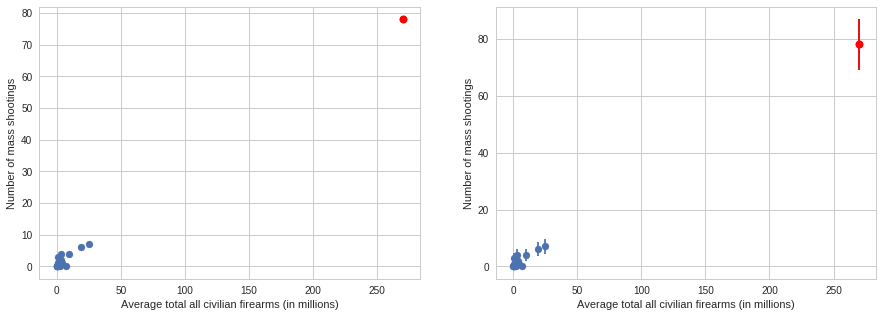

In [21]:
fig = pl.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.scatter(df['Average total all civilian firearms'] / 1e6 , df['Number of mass shootings'])
ax1.plot(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of mass shootings'], 'ro', markersize=8)
ax1.set_xlabel('Average total all civilian firearms (in millions)')
ax1.set_ylabel('Number of mass shootings')
ax1.set_ylim();

ax2 = fig.add_subplot(122)
ax2.scatter(df['Average total all civilian firearms'] / 1e6 , df['Number of mass shootings'])
ax2.errorbar(df['Average total all civilian firearms'] / 1e6 , df['Number of mass shootings'],
            yerr=np.sqrt(df['Number of mass shootings'] * 1.0), fmt='.')
ax2.plot(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of mass shootings'], 'ro', markersize=8)
ax2.errorbar(df_usa['Average total all civilian firearms'] / 1e6 , df_usa['Number of mass shootings'],
            yerr=np.sqrt(df_usa['Number of mass shootings'] * 1.0), fmt='.', color='r')
ax2.set_xlabel('Average total all civilian firearms (in millions)')
ax2.set_ylabel('Number of mass shootings')
ax2.set_ylim();

### Figure 9. Number of mass shootings against Average total civilian firearms (in millions) 
This shows the relationship between the number of mass shootings against the average total civilian firearms per country and the US is highlighted in red. It has the highest number of civilian firearms and also the highest number of mass shootings.

### Figure 10. Number of mass shootings against Average total civilian firearms (in millions) - With Errors
The errors represent a Poisson statistic.

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

```
import seaborn  as sns
sns.regplot(x="x", y="y", data=df);
```

In [22]:
df['shootingspp'] = df['Number of mass shootings'] / df['pop'] * 1e6
df.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,pop,gdp,Guns/100 inhabitants,Number of mass shootings,gdpcapita,shootingspp
0,Australia,30.0,3050000.0,22728254.0,1.538194e+12,15.0,4,67677.634766,0.175992
1,Austria,18.0,2500000.0,8429991.0,4.074516e+11,30.4,1,48333.572727,0.118624
2,Canada,173.0,9950000.0,34750545.0,1.824289e+12,30.8,4,52496.694870,0.115106
3,Denmark,15.0,650000.0,5591572.0,3.271489e+11,12.0,0,58507.500210,0.000000
4,Finland,24.0,2400000.0,5413971.0,2.567065e+11,45.3,2,47415.559871,0.369415


In [23]:
df['firearmspp'] = df['Average total all civilian firearms'] / df['pop']
df.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,pop,gdp,Guns/100 inhabitants,Number of mass shootings,gdpcapita,shootingspp,firearmspp
0,Australia,30.0,3050000.0,22728254.0,1.538194e+12,15.0,4,67677.634766,0.175992,0.134194
1,Austria,18.0,2500000.0,8429991.0,4.074516e+11,30.4,1,48333.572727,0.118624,0.296560
2,Canada,173.0,9950000.0,34750545.0,1.824289e+12,30.8,4,52496.694870,0.115106,0.286326
3,Denmark,15.0,650000.0,5591572.0,3.271489e+11,12.0,0,58507.500210,0.000000,0.116246
4,Finland,24.0,2400000.0,5413971.0,2.567065e+11,45.3,2,47415.559871,0.369415,0.443298


In [24]:
lm = smf.ols(formula='shootingspp ~ firearmspp', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0374
Time:                        22:47:56   Log-Likelihood:                 11.424
No. Observations:                  22   AIC:                            -18.85
Df Residuals:                      20   BIC:                            -16.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0315      0.051      0.612      0.548        -0.076     0.139
firearmspp     0.3911      0.175      2.230      0.037         0.025     0.757
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:

weights = 1.0/df.yerror

Notice that:
1. sqrt(0) = 0
2. 1/0 = infinity
3. you cannot have weight that are infinity in your fit.

Please come up with a solution and justify it.

The latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

From the statsmodels documentation:
> The weights are presumed to be (proportional to) the inverse of the variance of the observations. That is, if the variables are to be transformed by 1/sqrt(W) you must supply weights = 1/W.

So for this case, we don't have to divide it by the square root since the function will do that already.
Weights to be passed will be 1/W, where W is the shootings per person.

In [25]:
df['weights'] = 1./df['shootingspp']
df = df.replace([np.inf, -np.inf], 1)
df.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,pop,gdp,Guns/100 inhabitants,Number of mass shootings,gdpcapita,shootingspp,firearmspp,weights
0,Australia,30.0,3050000.0,22728254.0,1.538194e+12,15.0,4,67677.634766,0.175992,0.134194,5.682063
1,Austria,18.0,2500000.0,8429991.0,4.074516e+11,30.4,1,48333.572727,0.118624,0.296560,8.429991
2,Canada,173.0,9950000.0,34750545.0,1.824289e+12,30.8,4,52496.694870,0.115106,0.286326,8.687636
3,Denmark,15.0,650000.0,5591572.0,3.271489e+11,12.0,0,58507.500210,0.000000,0.116246,1.000000
4,Finland,24.0,2400000.0,5413971.0,2.567065e+11,45.3,2,47415.559871,0.369415,0.443298,2.706986


## Why use 1 as the weights for the infinity values?
As per the scipy documentation:
> If no weights are supplied the default value is 1 and WLS results are the same as OLS.

Since we cannot have infinity weights in the fit, using the default value makes sense since it would make the WLS results similar to OLS. Since WLS is like an extended version of the OLS which accounts for the uncertainties when fitting the model.

In [26]:
lmw = smf.wls(formula='shootingspp ~ firearmspp', data=df, weights=df['weights']).fit()
lmw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.333
Model:                            WLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     9.986
Date:                Tue, 17 Oct 2017   Prob (F-statistic):            0.00492
Time:                        22:47:56   Log-Likelihood:                 15.764
No. Observations:                  22   AIC:                            -27.53
Df Residuals:                      20   BIC:                            -25.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0180      0.031      0.576      0.571        -0.047     0.083
firearmspp     0.3732      0.118      3.160      0.005         0.127     0.619
==============================================================================
Omnibus:                       17.432   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.191
Skew:                           1.677   Prob(JB):                     6.80e-05
Kurtosis:                       6.113   Cond. No.                         6.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Polyfit
p, v = np.polyfit(df['firearmspp'], df['shootingspp'], 1)
print(p, v)

0.391060034483 0.0314880259769


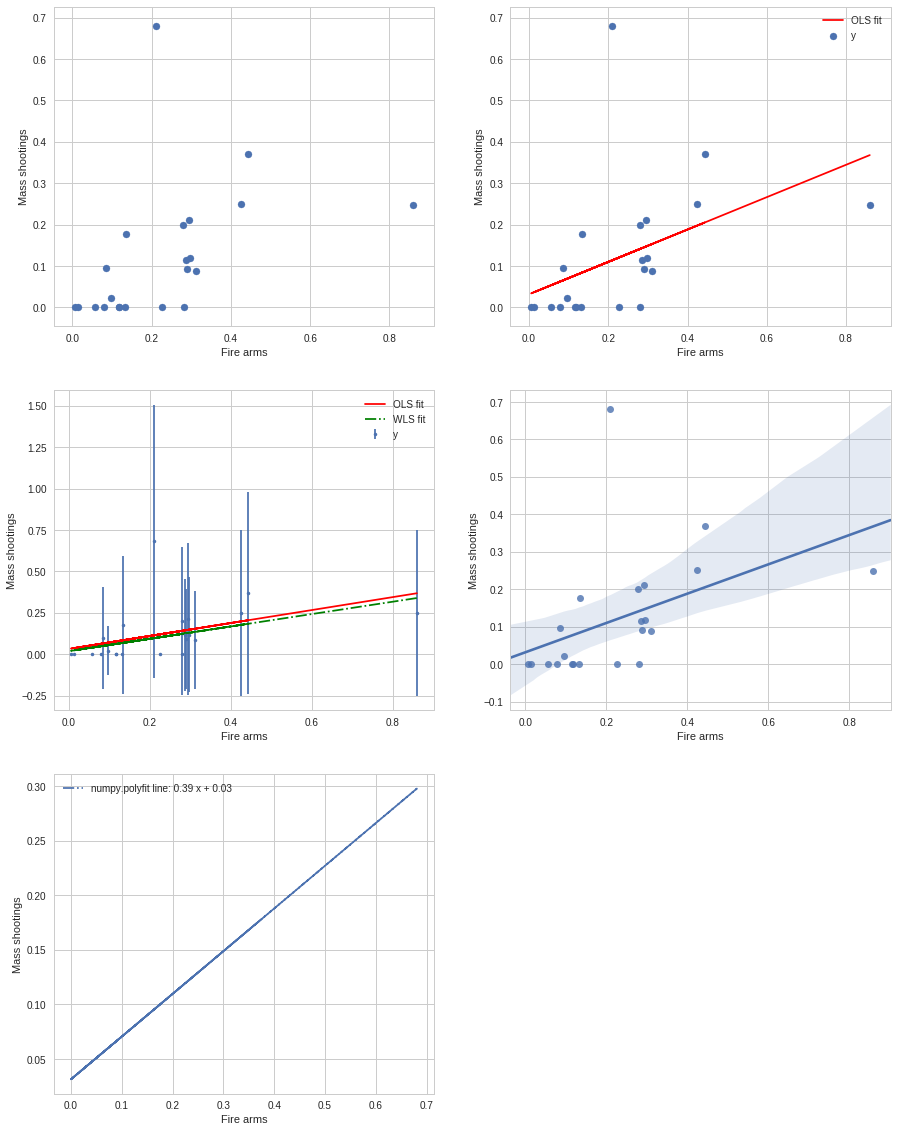

In [28]:
fig = pl.figure(figsize(15,20))

ax1 = fig.add_subplot(321)
ax1.scatter(df['firearmspp'], df['shootingspp'])
ax1.set_xlabel('Fire arms')
ax1.set_ylabel('Mass shootings')

ax2 = fig.add_subplot(322)
ax2.scatter(df['firearmspp'], df['shootingspp'], label='y')
ax2.plot(df['firearmspp'], lm.predict(), 'r-', label='OLS fit')
ax2.set_xlabel('Fire arms')
ax2.set_ylabel('Mass shootings')
ax2.legend()

ax3 = fig.add_subplot(323)
ax3.errorbar(df['firearmspp'], df['shootingspp'],
             yerr=np.sqrt(df['shootingspp']), label='y', fmt='.')
ax3.plot(df['firearmspp'], lm.predict(), 'r-', label='OLS fit')
ax3.plot(df['firearmspp'], lmw.predict(), 'g-.', label='WLS fit')
ax3.set_xlabel('Fire arms')
ax3.set_ylabel('Mass shootings')
ax3.legend()

ax4 = fig.add_subplot(324)
sns.regplot(x=df['firearmspp'], y=df['shootingspp'], data=df)
ax4.set_xlabel('Fire arms')
ax4.set_ylabel('Mass shootings')

ax5 = fig.add_subplot(325)
ax5.plot(df['shootingspp'], df['shootingspp'] * p + v, '-.',label="numpy.polyfit line: %.2f x + %.2f"%(p, v))
ax5.set_xlabel('Fire arms')
ax5.set_ylabel('Mass shootings')
ax5.legend()
plt.show()

### Figure 11. Linear Regression of the Number of mass shootings per person against the number of civilian fire arms per person.
1. shows the scatter plot of the data
2. shows the scatter plot of the data with an OLS linear regression fit
3. shows the scatter plot of the data with both the OLS and WLS linear regression fit
4. shows the scatter plot and the linear regression fit using seaborn's built in function regplot
5. the polyfit line for the linear regression done.

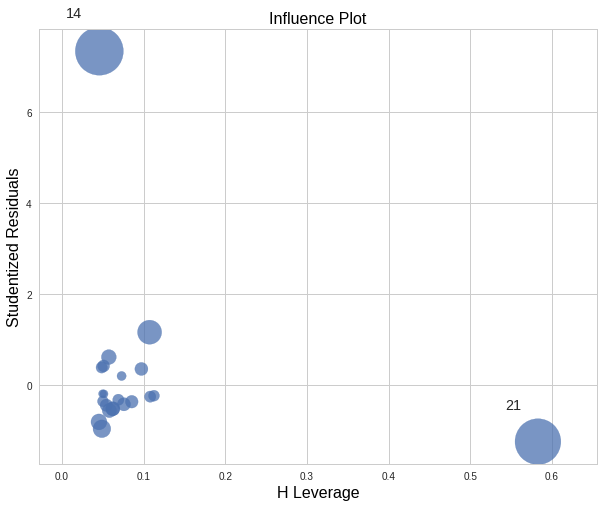

In [29]:
fig, ax = pl.subplots(figsize=(10,8))
fig = smgr.influence_plot(lm, alpha=0.05, ax=ax, criterion="cooks")
pl.show();

### Figure 12: Influence Plot
This plot shows the influence of the data to the regression. For this it shows that New Zealand (14) has a high residuals and the United States actually has a high leverage. If the United States had high residuals and high leverage, then it would greatly influence the change in the regression.

In [30]:
df.iloc[14]

Country                                New Zealand
Number of homicides by firearm                   7
Average total all civilian firearms         925000
pop                                     4.4081e+06
gdp                                    1.76193e+11
Guns/100 inhabitants                          22.6
Number of mass shootings                         3
gdpcapita                                  39970.3
shootingspp                               0.680565
firearmspp                                0.209841
weights                                    1.46937
Name: 14, dtype: object

In [31]:
df.iloc[21]

Country                                United States
Number of homicides by firearm                  9146
Average total all civilian firearms          2.7e+08
pop                                      3.13998e+08
gdp                                      1.61553e+13
Guns/100 inhabitants                            88.8
Number of mass shootings                          78
gdpcapita                                    51450.1
shootingspp                                 0.248409
firearmspp                                  0.859877
weights                                      4.02562
Name: 21, dtype: object